In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt
from pydataset import data

In [2]:
plt.rc('figure', figsize = (16,9))
plt.rc('axes.spines', top = False, right = False)
plt.rc('patch', ec = 'black', force_edgecolor = True)
plt.rc('font', size = 13)

np.random.seed(13)

# Simulation Based Approach

- Example: Codeup starts producing a scratch off lottery ticket called "Golden Codys". The odds of winning a prize must be advertised to the state, and since we are manufacturing the tickets, we know exactly how many winners and losers there are.
- Theory: Our population is the 1000 tickets we have manufactured
- Implementation: Create a boolean pandas Series
        - we model win with true and lose with false
        - because of this, we can take the mean of a series to measure the likelihood of winning

The actual probability of winning is 0.25


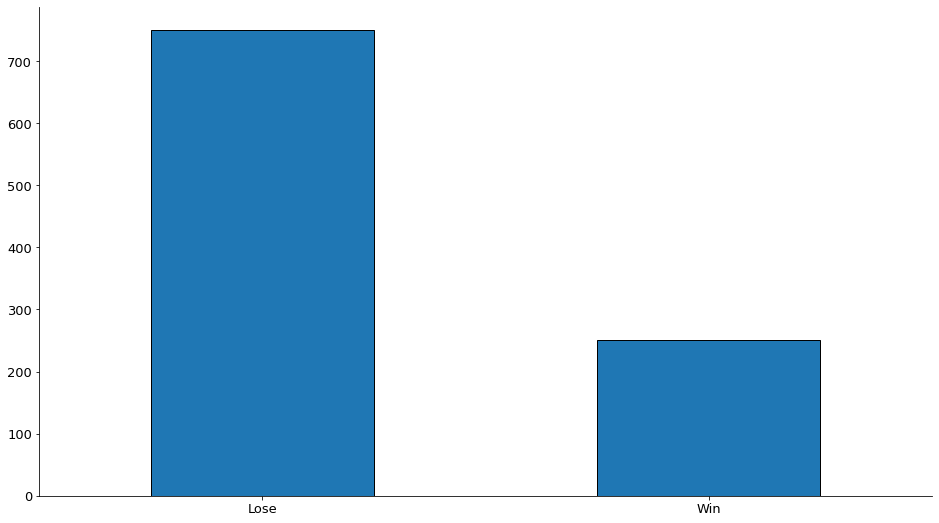

In [48]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar()
plt.xticks(rotation = 0)
print(f'The actual probability of winning is {tickets.mean()}')

Scenario: Each student in a classroom is given a Golden Cody scratch off at random

Theory

    We we take a random sample and calculate the win rate, we won't expect to see exactly 25% even though we know that is what the overall rate is.

Examples of biased samples:

    non-response: people that don't respond are a diff population
    undercoverage: some groups aren't well represented
    voluntary: people volunteer for surveys
    leading questions
    social desirability
    
Implementation: Use the .sample method on our series to randomly choose 25 tickets, representing 25 students in a classroom. Use .mean to calculate what percentage of the values are True, or are winning tickets.

In [49]:
n = 25
tickets.sample(n).mean()

0.12

Scenario: each student in 4 different cohorts is given a Golden Codys scratch off ticket, we want to calculate the win rate for each classroom.

Theory: it is unlikely any classroom will have exactly a 25% winrate, instead we will see slightly different numbers for each classroom.

Implementation: loop through a range of 5 to get a sample and calculate the winrate 5 times. Each of the 5 numbers produced represents the calculated winrate for one classroom of 25 students.

In [50]:
num_students_in_class = 25
for i in range(5):
    print(tickets.sample(num_students_in_class).mean())


0.28
0.28
0.08
0.24
0.36


Theory

The winrates we see aren't ever exactly 25%, but we would expect the rate to be closer to 25% than further away. That is, it is more likely that a classroom will come up with a win rate of 24% than a winrate of 10%.

If we were to repeat this experiment a whole bunch of times, say 10,000, we would find that the calculated winrates are, in fact, normally distributed.

That is, we would expect the calculated average winrate for a classroom to follow a normal distribution, even though the underlying random process is not based on a normal distribution

Implementation: To visualize this, we'll create a series full of calculated winrates for 10,000 classrooms, each classroom made up of 25 students. That is, we will simulate 10,000 classrooms of 25 students getting Golden Codys and calculate the average winrate for each of the 10,000 classrooms.

<AxesSubplot:ylabel='Frequency'>

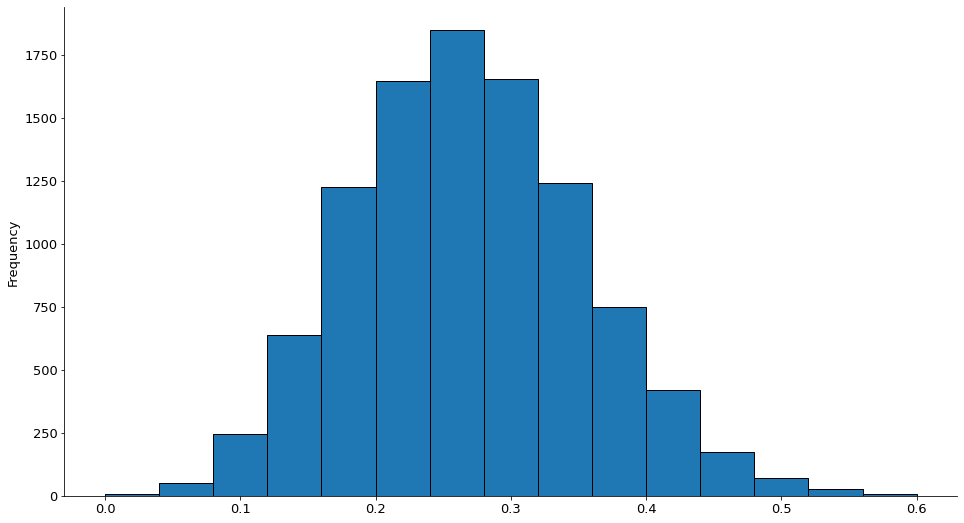

In [51]:
num_students_in_class = 25
trials = 10_000
x = []
for i in range(trials):
    x.append(tickets.sample(num_students_in_class).mean())
x = pd.Series(x)
x.plot.hist(bins = 15)

In [52]:
x.mean()


0.24922399999999556

Theory

The above visual represents the sampling distribution for the winrate of Golden Codys, based on a class of 25.

The Central Limit Theorm says that sampling distribution will be normally distributed even if the underlying random variable isn't.

# Mini Exercise -- CLT

Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls.

Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.

Plot the distribution of the calculated averages. What do you notice about the shape of the distribution of calculated averages? What kind of distribution is the underlying random variable (i.e. one dice roll?)

In [53]:
nums = pd.Series([1,2,3,4,5,6] * 6)
nums.sample(6).mean()

3.8333333333333335

<AxesSubplot:ylabel='Frequency'>

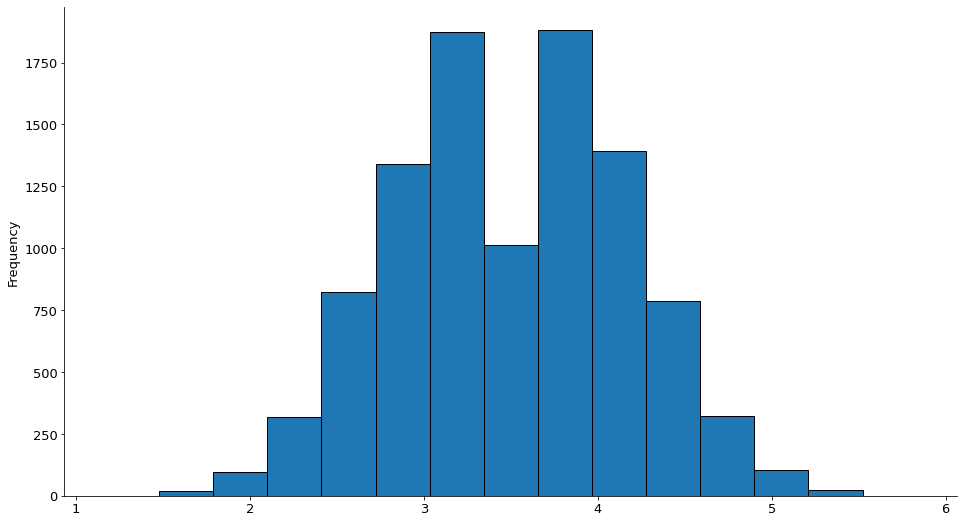

In [54]:
trials = 10_000
a = []
for i in range(10_000):
    a.append(nums.sample(6).mean())
a = pd.Series(a)
a.plot.hist(bins = 15)

Theory: in practice, we won't have 10,000 samples to work with, but rather just 1. We can stil rely on the sampling distribution being normally distributed, and this has some intersting properties.

the mean of the sampling distribution of the sample means will be the "true" mean

the variance of the sampling distribution is the population variable divided by the sample size

the standard deviation of the sampling distribution is √ pqn/n
 (for our example), aka the standard error

In [55]:
se = math.sqrt((.25 * .75) / n)

In [56]:
print('SE:                 %.4f' % se)
print('sample_means.std(): %.4f' % x.std())

SE:                 0.0866
sample_means.std(): 0.0857


That the sampling distribution being normally distributed is very powerful and has important implications:

confidence intervals for population parameter estimates (e.g. estimating the population mean)

    as n goes up, interval becomes smaller
    
    as certainty goes up, interval becomes larger
    
    99% of calculated CIs will contain the true mean (e.g. if we ran simulations and re-sampled, 99% of the simulations' calculated CIs would contain the true mean)
    
hypothesis testing

    One classroom calculates their winrate at 20% and claims the tickets were distributed unfairly. What is the likelihood we observe a 20% (or smaller) winrate just due to chance?

In [57]:
mean = x.mean()
sd = x.std()


stats.norm(mean, sd).cdf(0.2)

0.28283511827393837

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?


$H_{0}$ = The internet latency has not changed the same since we switched the internet service provider.

$H_{a}$ = The internet latency has gone down since we switced the internet service provider

type I error = when we reject the null hypothesis when the internet latency has not changed

type II error = when we fail to reject the null hypothesis, when we know that the internet latency has changed since switching the internet provider

true positive is when null hypothesis is false and we reject it(the internet latency has changed and we reject null hypothesis)

true negative is when null hypothesis is true and we accept it( the internet latency has not changed and we fail to reject it)

   - Is the website redesign any good?
 
$H_{0}$ = there is no change in the website with a  redesign
 
$H_{a}$ = the redesign has made the website much better/or it was better before the redesign
 
 type1 error: when we reject the null hypothesis that there is no change in the website with a redesign when in fact its true
 
 type2 error: when we fail to reject the null hypothesis that there is no change in the website with a redesign when in fact it looks much better or a lot worse
 
 true positive is when the null hypothesis is false and we reject it
 
 true negative is is when the null hypothesis is true and we accept it

   - Is our television ad driving more sales?
   
  $H_{0}$  = no change in television sales due to ad
  
  $H_{a}$ = sales in television has changed due to ad
  
  type I error : when we reject the null hypothesis that there is no change in television sales due to ad when infact its true
  
  type II error : when we fail to reject the null hypothesis that there is no change in the television sale post ad when its false.

# T Test

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.


n1 = 40

mean1 = 90

sd1 = 15


n2 = 50

mean2 = 100

sd2 = 20


$H_{0}$: mean2 = mean 1

$H_{a}$ : mean2 != mean 1

In [58]:
n1 = 40
mean1 = 90
sd1 = 15
n2 = 50
mean2 = 100
sd2 = 20
a = 0.05

sd_pooled = sqrt((((n1 - 1)*(sd1)**2) + ((n2 - 1)*(sd2)**2))/n1 + n2 - 2)
t  = (mean2 - mean1)/(sd_pooled * sqrt((1/n1) + (1/n2)))
t


1.7129246547103592

In [59]:
degf = (n1 + n2) - 2
p = stats.t(degf).sf(t) 
p

0.045123855124880305

In [60]:
print (f'since p < a is {p<a} we reject the null hypothesis')

since p < a is True we reject the null hypothesis


Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

- Are compact cars more fuel-efficient than the average car?

- Do manual cars get better gas mileage than automatic cars?

In [61]:
mpg = data('mpg') # here we are loading the dataset

mpg['fuel_eff'] = (mpg.hwy + mpg.cty)/2 # getting the fuel effeciency by adding the city mileage and the highway mileage
# and dividing it by 2

# getting the data just for the model year 2008
model_08 = mpg[mpg.year == 2008].fuel_eff


# getting the data for the model year 1999
model_99 = mpg[mpg.year == 1999].fuel_eff
n_99 = model_99.shape[0]
n_08 = model_08.shape[0]
model_99_mean = model_99.mean()
model_99_mean
model_08_mean = model_08.mean()
model_08_mean


a = 0.05

# generating our hypothesis

$H_{0}$: mean_08 = mean_99

$H_{a}$ : mean_08 != mean_99

- since we dont know if the mean fuel effeciency of the 08 model is lower or higher than 99 model, it will be a two tailed t-test

setting our significance level:

$a$ = 0.05

<AxesSubplot:>

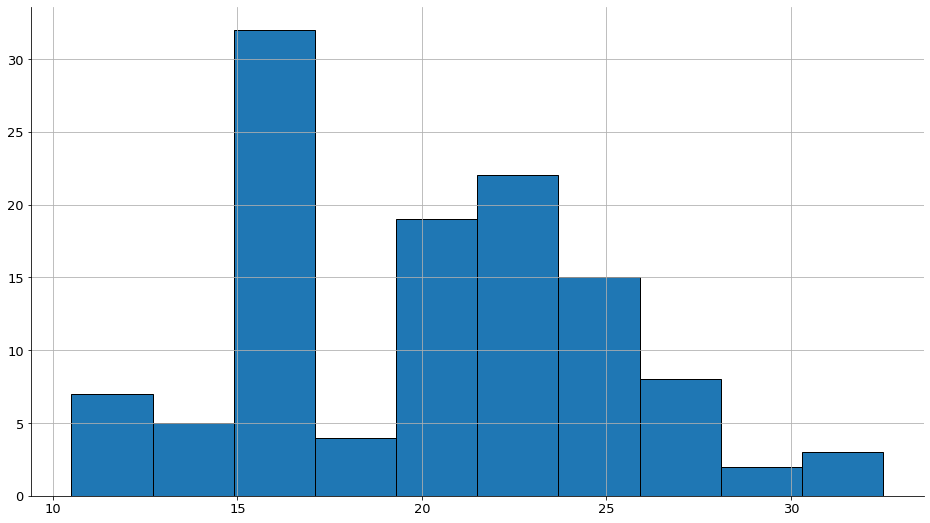

In [62]:
# lets plot the data to check their distribution

model_08.hist()

<AxesSubplot:>

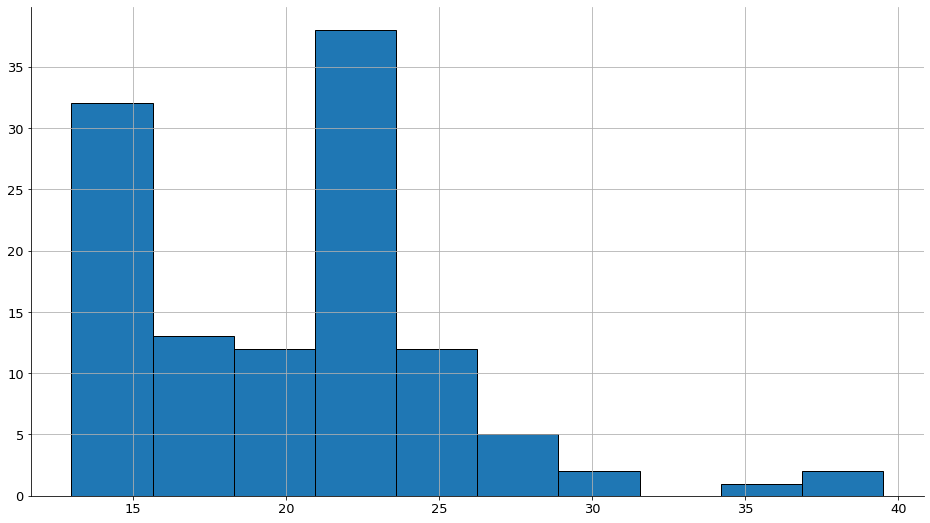

In [63]:
model_99.hist() # plottin our 99 model 

In [64]:
model_08.var()

24.097480106100797

In [65]:
model_99.var()

27.122605363984682

# verifying assumtions:
   - normal = yes
   - independent = yes
   - variance = approximately yes, so we will assume its false

In [66]:
# getting into the calculations

t,p = stats.ttest_ind(model_08, model_99, equal_var = False)
t,p

(-0.21960177245940962, 0.8263750772060638)

In [67]:
print(f' since p < a is {p<a}, we fail to reject the null hypothesis')

 since p < a is False, we fail to reject the null hypothesis


- Are compact cars more fuel-efficient than the average car?

<AxesSubplot:>

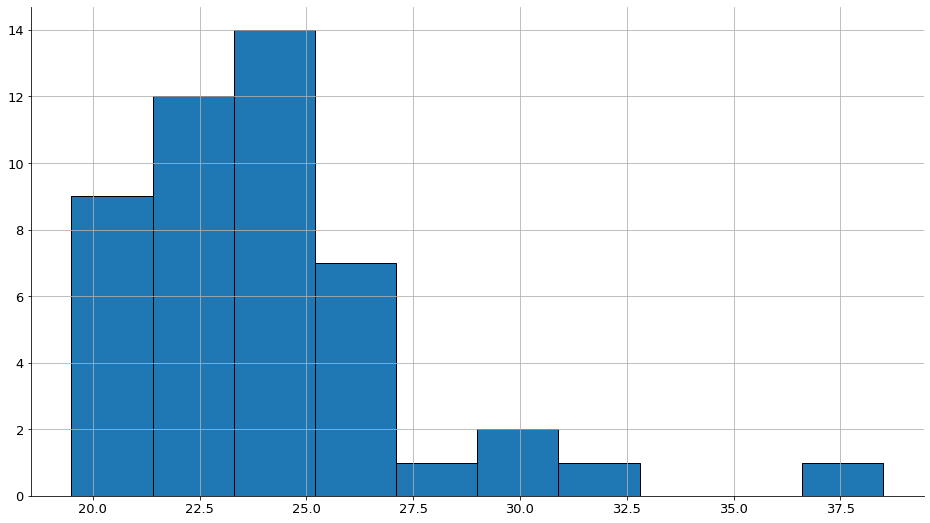

In [68]:
mpg
a = 0.05
compact = mpg[mpg['class'] == 'compact'].fuel_eff
not_compact = mpg[mpg['class'] != 'compact'].fuel_eff


# lets plot the distribution
compact.hist()

<AxesSubplot:>

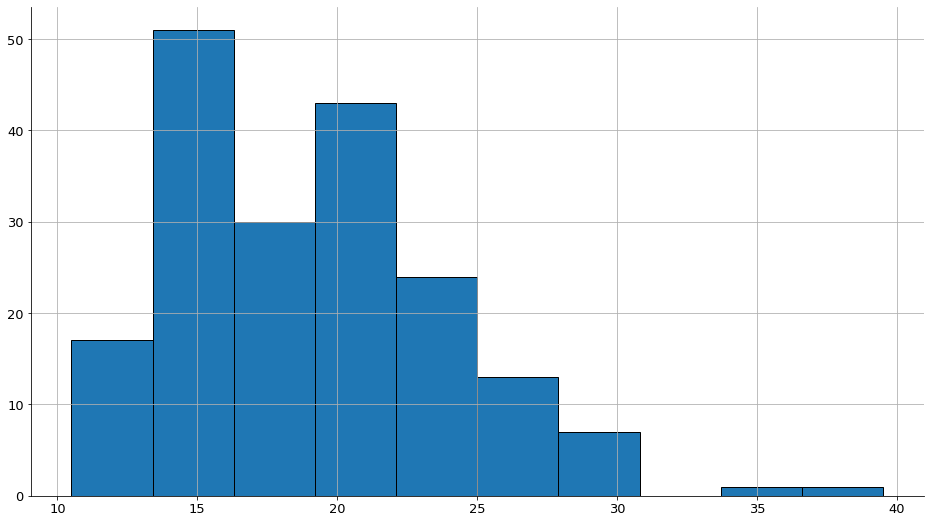

In [69]:
not_compact.hist()

In [70]:
compact.var()

12.442876965772433

In [71]:
not_compact.var()

23.652794548904602

$H_{0}$: compact cars and non compact cars dont have difference in fuel effeciency

$H_{a}$ : compact cars are more fuel effecient than non compact cars


verifying assumptions:
 independent = yes
 normal distribution = yes
 equal_variance = false
 

In [72]:
t,p = stats.ttest_ind(compact, not_compact)
t,p

(6.731177612837954, 1.3059121585018135e-10)

In [73]:
p/2 < a

True

In [74]:
print(f'since p/2 < a is True, we reject the null hypothesis that the compact and not compact cars have same fuel effecience')

since p/2 < a is True, we reject the null hypothesis that the compact and not compact cars have same fuel effecience


- Do manual cars get better gas mileage than automatic cars?

In [75]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [76]:
# getting our data ready. We have various types of manual and automatic, so we consolidate them as one using the following
# python syntax

manual = mpg[mpg.trans.str.contains('manual', regex = False)].fuel_eff
automatic = mpg[mpg.trans.str.contains('auto', regex = False)].fuel_eff


<AxesSubplot:>

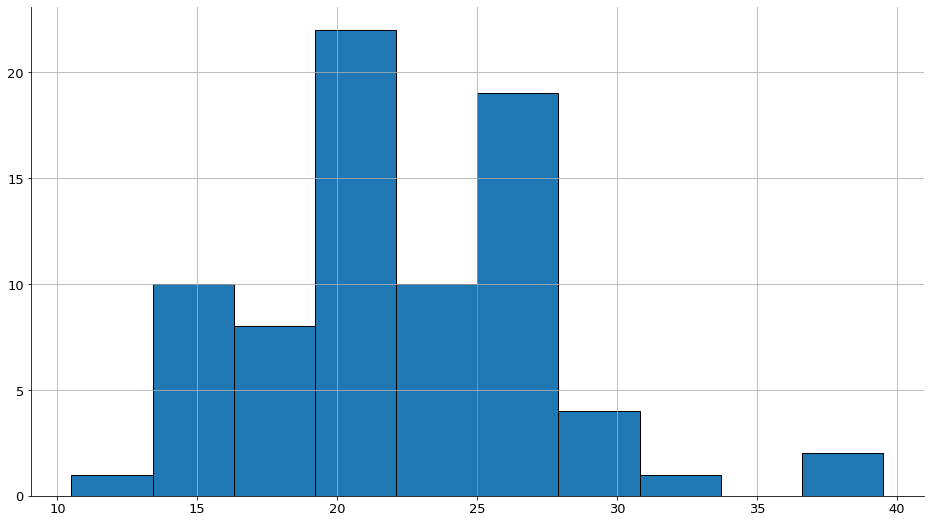

In [77]:
# now lets check to see how our distribution looks like
manual.hist()

<AxesSubplot:>

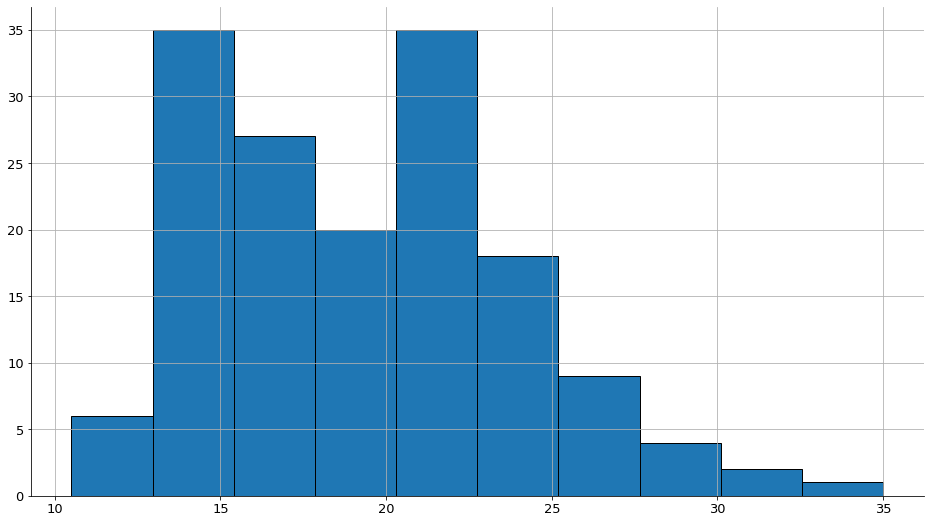

In [78]:
automatic.hist()

In [79]:
# lets check the variance
manual.var()

26.635167464114826

In [80]:
# variance for automatic
automatic.var()

21.942777233382337

- there is a slight variation in the fuel effeciency

$H_{0}$: mean_manual_mileage = mean_automatic_mileage

$H_{a}$: mean_manual_mielage > mean_automatic_mileage

$a$: 0.05

Verifying assumptions:
- normal distribution = True
- independent = true
- equal_variance = False

In [81]:
a = 0.05
t,p = stats.ttest_ind(manual, automatic, equal_var = False)
t,p

(4.443514012903071, 1.795224899991793e-05)

In [82]:
p/2 < a
t > 0

True

In [83]:
print('Since p/2 < a is True, and t > 0,  we can reject the null hypothesis which states the gas mileage of manual cars is equal to automatic cars')

Since p/2 < a is True, and t > 0,  we can reject the null hypothesis which states the gas mileage of manual cars is equal to automatic cars


# Correlation

In [84]:
telco = pd.read_csv('telco.csv')
telco['tenure'] = telco.total_charges/telco.monthly_charges
telco_df = telco[telco.tenure.isna()== False]
telco_df

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No,9.044207
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No,9.055092
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes,3.800406
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes,12.631122
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes,3.187128
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Male,0,Yes,Yes,1,0,2,Credit card (automatic),19.75,856.50,No,43.367089
7039,9992-RRAMN,Male,0,No,No,1,0,0,Mailed check,18.90,18.90,No,1.000000
7040,9992-UJOEL,Male,1,Yes,Yes,1,2,1,Bank transfer (automatic),84.95,4018.05,No,47.298999
7041,9993-LHIEB,Female,0,No,No,1,2,1,Mailed check,94.05,633.45,No,6.735247


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

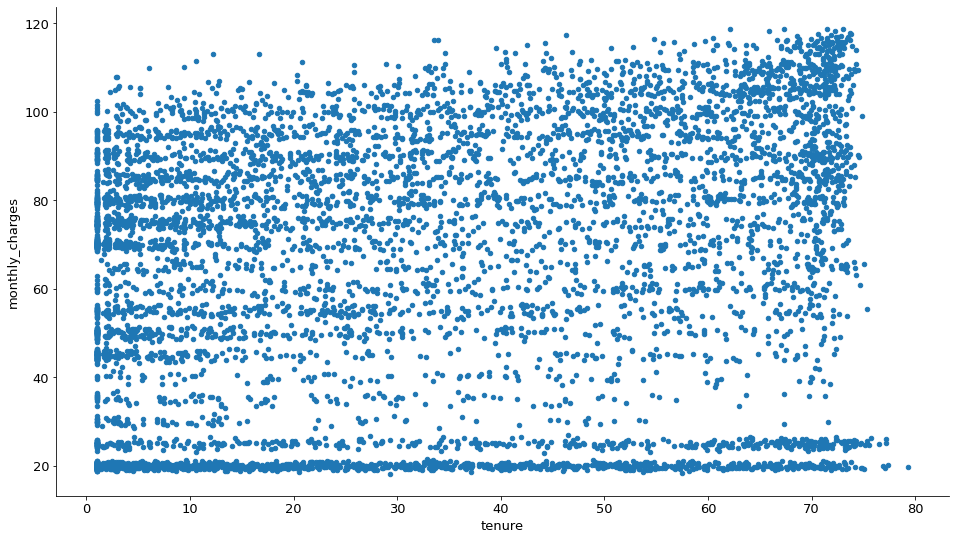

In [85]:
telco_df.plot.scatter(y = 'monthly_charges', x = 'tenure') # visualizing our data 

a = 0.05

$H_{0}$: there is no linear relation between monthly charges and tenure

$H_{a}$ : there is a linear relation between monthly charges and tenure  

In [86]:
x  = telco_df.tenure
y = telco_df.monthly_charges

In [87]:
r,p = stats.pearsonr(x,y)
r,p

(0.24604059691061692, 1.820659268201368e-97)

In [88]:
print('Since our p is lower than our a, we reject the null hypothesis that there is no linear relation between tenure and monthly charges')

Since our p is lower than our a, we reject the null hypothesis that there is no linear relation between tenure and monthly charges


a = 0.05

$H_{0}$: there is no linear relation between total charges and tenure

$H_{a}$ : there is a linear relation between total charges and tenure  

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

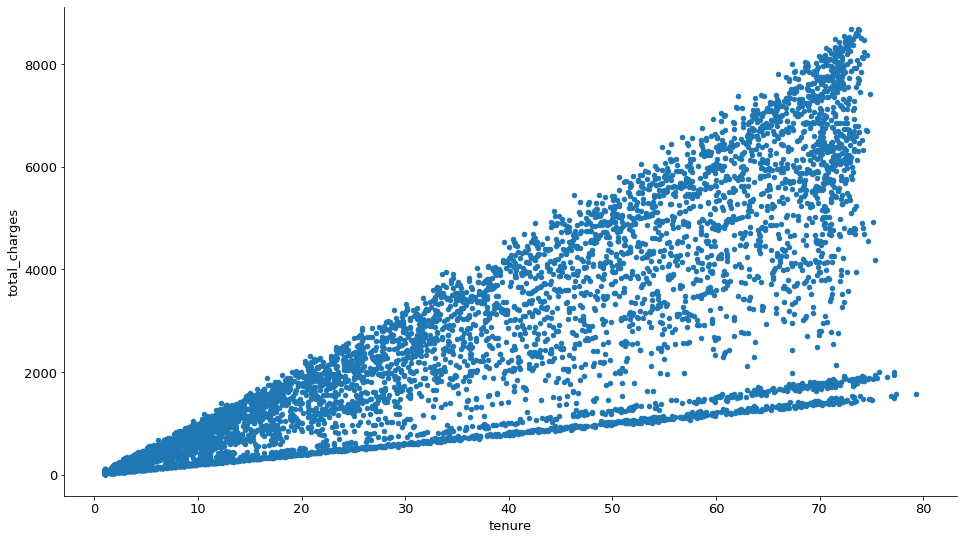

In [89]:
telco_df.plot.scatter(y = 'total_charges', x = 'tenure')

In [90]:
x  = telco_df.tenure
y = telco_df.total_charges

In [91]:
r,p = stats.pearsonr(x,y)
r,p

(0.8257411779462007, 0.0)

In [92]:
print('Since our p is lower than a, we reject the null hypothesis that there is no linea relation between tenure and total charges')

Since our p is lower than a, we reject the null hypothesis that there is no linea relation between tenure and total charges


In [93]:
telco_df

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No,9.044207
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No,9.055092
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes,3.800406
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes,12.631122
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes,3.187128
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Male,0,Yes,Yes,1,0,2,Credit card (automatic),19.75,856.50,No,43.367089
7039,9992-RRAMN,Male,0,No,No,1,0,0,Mailed check,18.90,18.90,No,1.000000
7040,9992-UJOEL,Male,1,Yes,Yes,1,2,1,Bank transfer (automatic),84.95,4018.05,No,47.298999
7041,9993-LHIEB,Female,0,No,No,1,2,1,Mailed check,94.05,633.45,No,6.735247


In [94]:
df = pd.read_csv('telco_data.csv')

df.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'Unnamed: 9', 'total_charges', 'monthly_charges', 'has_phone',
       'has_internet', 'Service_Type', 'churn', 'tenure', 'Internet_type',
       'Phone_Type', 'Contract_Len', '# of Partner/Dependents',
       'Customer_Age'],
      dtype='object')

In [95]:
tel_df = df.drop(['Unnamed: 9'], axis = 1)


In [96]:

tel_df

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,total_charges,...,has_phone,has_internet,Service_Type,churn,tenure,Internet_type,Phone_Type,Contract_Len,# of Partner/Dependents,Customer_Age
0,9995-HOTOH,Female,0,No,No,1,2,0,Mailed check,$70.15,...,True,True,Phone and Internet,Yes,1.00,Fiber Optic,One Line,Month-to-Month,0,0.5
1,9993-LHIEB,Female,0,No,No,1,2,1,Mailed check,$633.45,...,True,True,Phone and Internet,No,6.74,Fiber Optic,One Line,1 Year,0,1.0
2,9992-UJOEL,Male,1,Yes,Yes,1,2,1,Bank transfer (automatic),"$4,018.05",...,True,True,Phone and Internet,No,47.30,DSL,One Line,1 Year,3,4.0
3,9992-RRAMN,Male,0,No,No,1,0,0,Mailed check,$18.90,...,True,False,Phone Only,No,1.00,No Internet Service,One Line,Month-to-Month,0,0.5
4,9987-LUTYD,Male,0,Yes,Yes,1,0,2,Credit card (automatic),$856.50,...,True,False,Phone Only,No,43.37,No Internet Service,One Line,2 Year,3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,$267.40,...,True,True,Phone and Internet,Yes,3.19,No Internet Service,One Line,Month-to-Month,1,0.5
7039,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,"$1,237.85",...,True,True,Phone and Internet,Yes,12.63,No Internet Service,One Line,Month-to-Month,1,1.5
7040,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,$280.85,...,True,True,Phone and Internet,Yes,3.80,No Internet Service,One Line,Month-to-Month,0,0.5
7041,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,$542.40,...,True,True,Phone and Internet,No,9.06,No Internet Service,Two or More Lines,Month-to-Month,0,1.0


In [97]:
te_df = tel_df[tel_df.tenure.isna()== False]
te_df= te_df[te_df.total_charges.isna() == False]

In [98]:
te_df


,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,total_charges,...,has_phone,has_internet,Service_Type,churn,tenure,Internet_type,Phone_Type,Contract_Len,# of Partner/Dependents,Customer_Age
0,9995-HOTOH,Female,0,No,No,1,2,0,Mailed check,$70.15,...,True,True,Phone and Internet,Yes,1.00,Fiber Optic,One Line,Month-to-Month,0,0.5
1,9993-LHIEB,Female,0,No,No,1,2,1,Mailed check,$633.45,...,True,True,Phone and Internet,No,6.74,Fiber Optic,One Line,1 Year,0,1.0
2,9992-UJOEL,Male,1,Yes,Yes,1,2,1,Bank transfer (automatic),"$4,018.05",...,True,True,Phone and Internet,No,47.30,DSL,One Line,1 Year,3,4.0
3,9992-RRAMN,Male,0,No,No,1,0,0,Mailed check,$18.90,...,True,False,Phone Only,No,1.00,No Internet Service,One Line,Month-to-Month,0,0.5
4,9987-LUTYD,Male,0,Yes,Yes,1,0,2,Credit card (automatic),$856.50,...,True,False,Phone Only,No,43.37,No Internet Service,One Line,2 Year,3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,$267.40,...,True,True,Phone and Internet,Yes,3.19,No Internet Service,One Line,Month-to-Month,1,0.5
7039,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,"$1,237.85",...,True,True,Phone and Internet,Yes,12.63,No Internet Service,One Line,Month-to-Month,1,1.5
7040,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,$280.85,...,True,True,Phone and Internet,Yes,3.80,No Internet Service,One Line,Month-to-Month,0,0.5
7041,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,$542.40,...,True,True,Phone and Internet,No,9.06,No Internet Service,Two or More Lines,Month-to-Month,0,1.0


In [99]:
# getting the phone only customers with no internet service and finding the relation between the monthly charge tenure


phone_no_internet = te_df[(te_df.Service_Type == 'Phone Only') & (te_df.Internet_type== 'No Internet Service')]
x = phone_no_internet.monthly_charges.str.replace('$', '').astype(float)
y = phone_no_internet.tenure



a = 0.05

$H_{0}$: there is no linear relation between monthly charges and tenure for customers with phone service only

$H_{a}$ : there is a linear relation between monthly charges and tenure  for customers with phone service only

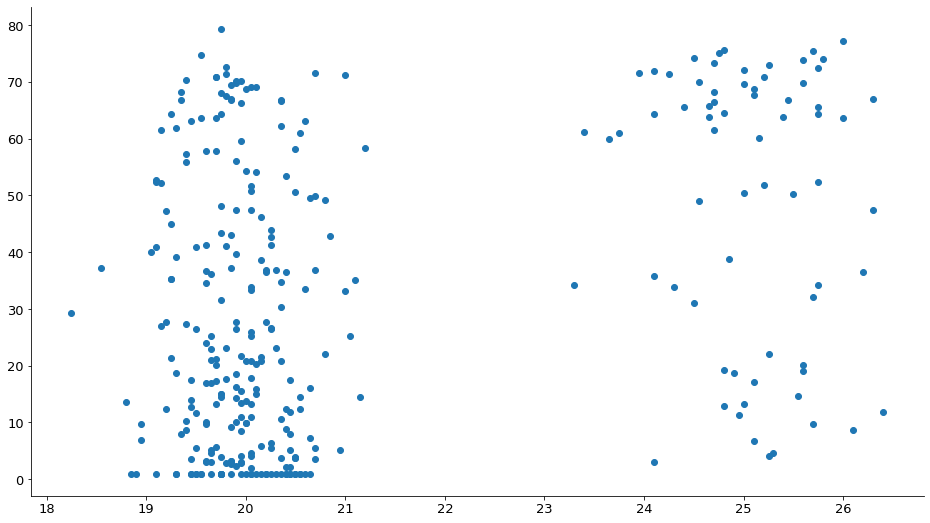

In [100]:

plt.scatter(x,y)

In [101]:
a = 0.05 # setting our significance level



In [102]:
r,p = stats.pearsonr(x,y)
r,p



(0.3437735266259978, 3.190112307910751e-10)

In [103]:
p < a

True

In [104]:
print('Since p is less than a, we reject our null hypothesis that there is no linear relationship between monthly charge and tenure')

Since p is less than a, we reject our null hypothesis that there is no linear relationship between monthly charge and tenure


In [105]:
# finding the pearson r for monthly charges Vs tenure and total_charges VS tenure for phone only with no internet

z = phone_no_internet.total_charges.str.replace('$', '')
x = z.str.replace(',', '').astype(float)
y = phone_no_internet.tenure

$H_0$ : there is no linear relationship between total_charges and tenure given customers with only phone but no internet

$H_a$: there is a linear relationship between total_charges and tenure givern customers with only phone but no internet

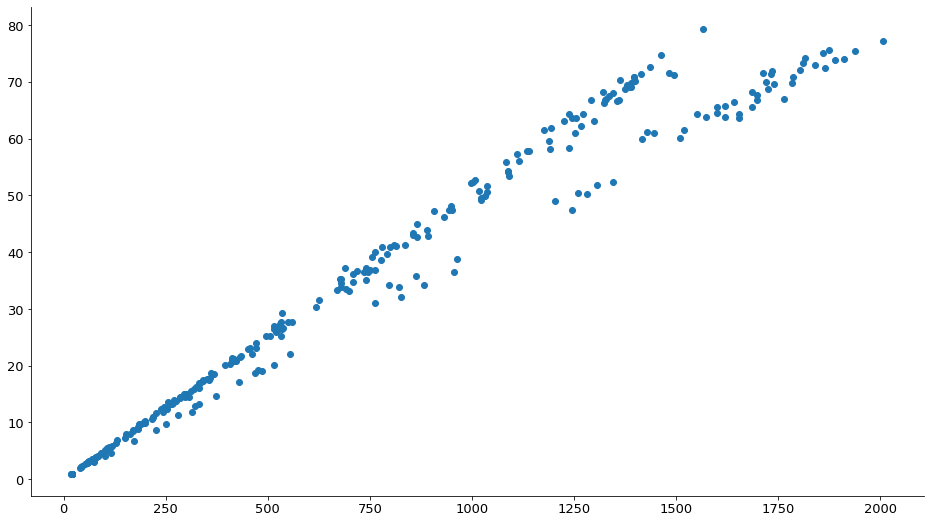

In [106]:
a = 0.05

plt.scatter(x,y)


In [107]:
r,p = stats.pearsonr(x,y)
if p < a:
    print("We rejct the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
print(p)

We rejct the null hypothesis
1.8504808851590456e-238


- finding the pearson r for monthly charges VS tenure and total_charges Vs tenure for phone and internet customerswith fiber optic lines

$H_0$ : there is no linear relationship between total_charges and tenure given customers with phone and fiber opic internet

$H_a$: there is a linear relationship between total_charges and tenure givern customers with only phone and fiber opic internet

In [108]:
# setting our significance level

a = 0.05 

phone_fiber_optic= te_df[(te_df.Service_Type == 'Phone and Internet') & (te_df.Internet_type== 'Fiber Optic')]
x = phone_no_internet.monthly_charges.str.replace('$', '').astype(float)
y = phone_no_internet.tenure

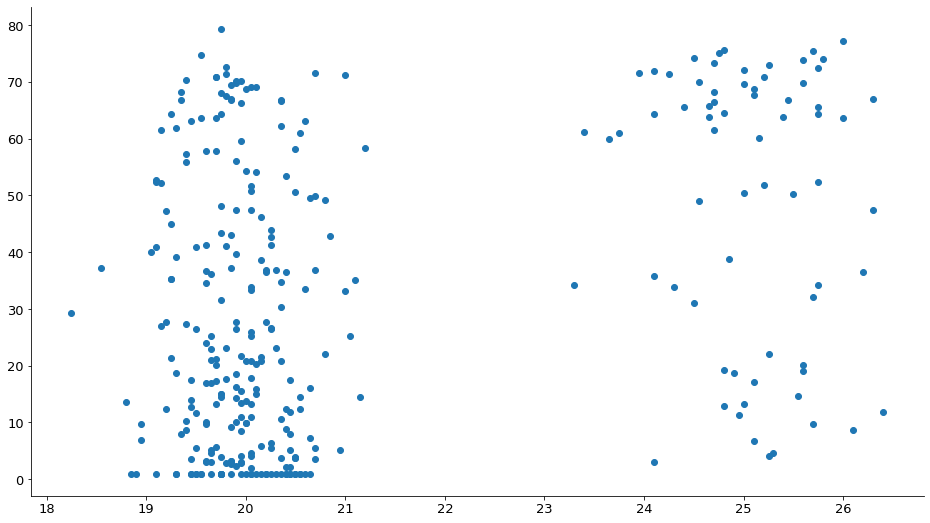

In [109]:
plt.scatter(x,y)

In [110]:
r,p = stats.pearsonr(x,y)
r,p

(0.3437735266259978, 3.190112307910751e-10)

In [111]:
if p < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    
print(p)

We reject the null hypothesis
3.190112307910751e-10


Use the employees database.

Is there a relationship between how long an employee has been with the company and their salary?

Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [112]:
from env import host, user, password

# creating a function that generates the url for sql
def get_db_url(host, user, password, database_name):
    user = user
    host = host
    password = password
    db = database_name
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [113]:
sql_query = 'SELECT emp_no,(TIMESTAMPDIFF(SECOND, hire_date, curdate()))/(60*60*24*365) as emp_length FROM employees'
employee_url = get_db_url(host, user, password, 'employees')
employees = pd.read_sql(sql_query, employee_url)
employees


,emp_no,emp_length
0,10001,34.2274
1,10002,34.8219
2,10003,34.0548
3,10004,33.7945
4,10005,31.0110
...,...,...
300019,499995,27.6740
300020,499996,29.9699
300021,499997,34.4082
300022,499998,26.9233


In [114]:
sql = 'select * from salaries where to_date > curdate()'
salary_url = get_db_url(host, user, password, 'employees')
salary = pd.read_sql(sql, salary_url)
salary

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [115]:
employees_salary = pd.merge(employees, salary, left_on = 'emp_no', right_on = 'emp_no', how = 'inner')
employees_salary

,emp_no,emp_length,salary,from_date,to_date
0,10001,34.2274,88958,2002-06-22,9999-01-01
1,10002,34.8219,72527,2001-08-02,9999-01-01
2,10003,34.0548,43311,2001-12-01,9999-01-01
3,10004,33.7945,74057,2001-11-27,9999-01-01
4,10005,31.0110,94692,2001-09-09,9999-01-01
...,...,...,...,...,...
240119,499995,27.6740,52868,2002-06-01,9999-01-01
240120,499996,29.9699,69501,2002-05-12,9999-01-01
240121,499997,34.4082,83441,2001-08-26,9999-01-01
240122,499998,26.9233,55003,2001-12-25,9999-01-01


In [116]:
x = employees_salary.emp_length
y = employees_salary.salary

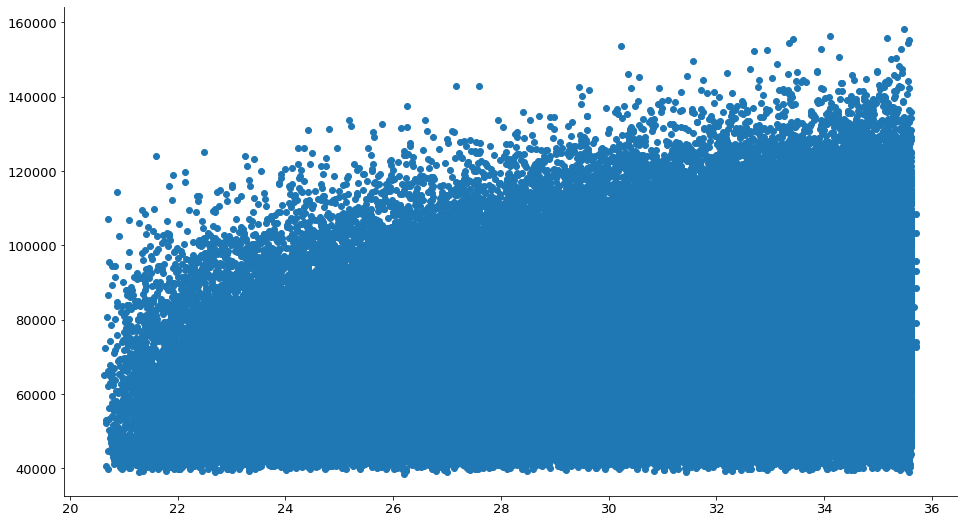

In [117]:
plt.scatter(x,y)

In [118]:
a = 0.05

$H_0$: there is no relation between employment length and salary 

$H_a$: there is a linear relation between employment length and salary

In [119]:
r,p = stats.pearsonr(x,y)
r,p

(0.3064625541021708, 0.0)

In [120]:
if p <a:
    print("We reject the null hypothesis")
else:
    print("we fail to reject the null hypothesis")
    
p

We reject the null hypothesis


0.0

In [121]:
sql_q = "select emp_no, count(title) as num_title_held from titles group by emp_no"
url = get_db_url(host, user, password, 'employees')
title = pd.read_sql(sql_q, url)
title

,emp_no,num_title_held
0,10001,1
1,10002,1
2,10003,1
3,10004,2
4,10005,2
...,...,...
300019,499995,1
300020,499996,2
300021,499997,2
300022,499998,2


In [122]:
employee_title = pd.merge(employees, title, left_on = 'emp_no', right_on = 'emp_no', how = 'inner')
employee_title 

,emp_no,emp_length,num_title_held
0,10001,34.2274,1
1,10002,34.8219,1
2,10003,34.0548,1
3,10004,33.7945,2
4,10005,31.0110,2
...,...,...,...
300019,499995,27.6740,1
300020,499996,29.9699,2
300021,499997,34.4082,2
300022,499998,26.9233,2


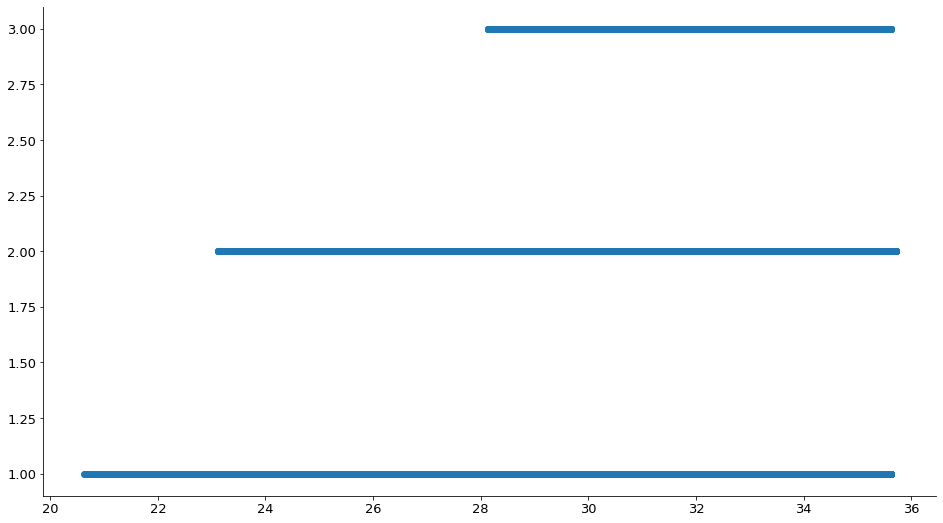

In [123]:
x = employee_title.emp_length
y = employee_title.num_title_held
plt.scatter(x,y)

In [124]:
r,p = stats.pearsonr(x,y)
r,p

(0.2665989212028123, 0.0)

In [125]:
if p < a:
    print(" We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    
p

 We reject the null hypothesis


0.0

- Use the sleepstudy data. Is there a relationship between days and reaction time?

In [126]:
sleep_study = data('sleepstudy')
sleep_study

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [127]:
x = sleep_study.Days
y = sleep_study.Reaction

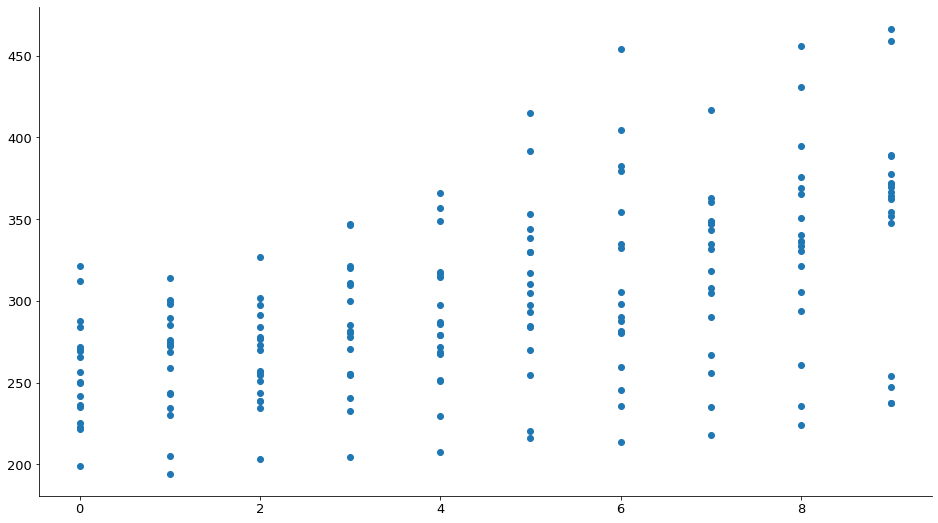

In [128]:
plt.scatter(x,y)

# Chi2

In [129]:
df = pd.DataFrame()
df['codeup student'] = [49,1]
df['not codeup student'] = [20,30]
df.index = ['Use a Macbook', 'Doesnt Use a Macbook']
df

,codeup student,not codeup student
Use a Macbook,49,20
Doesnt Use a Macbook,1,30


$H_0$: using macbook and being a codeup student is independent to one another

$H_a$: using macbook and being a codeup student is dependent to one another

In [130]:

chi2, p, degf, expected = stats.chi2_contingency(df)

In [131]:
chi2, p, degf, expected

(36.65264142122487,
 1.4116760526193828e-09,
 1,
 array([[34.5, 34.5],
        [15.5, 15.5]]))

In [132]:
print("Siince the p value is really really low, we reject the null hypothesis that the two variables are independent of each other")

Siince the p value is really really low, we reject the null hypothesis that the two variables are independent of each other


Choose another 2 categorical variables from the mpg dataset and perform a chi*2
contingency table test with them. Be sure to state your null and alternative hypotheses.

In [133]:
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


$H_0$: the variables car make year and the class had no relationship to one another

$H_a$: the variables car make year and the class has relationship to one another

In [134]:
df1 = pd.crosstab(mpg['class'], mpg.year)
df1

year,1999,2008
class,,
2seater,2,3
compact,25,22
midsize,20,21
minivan,6,5
pickup,16,17
subcompact,19,16
suv,29,33


In [135]:
chi2,p, degf, expected = stats.chi2_contingency(df1)
chi2,p, degf, expected 

(1.0522991000885773,
 0.9835517873618908,
 6,
 array([[ 2.5,  2.5],
        [23.5, 23.5],
        [20.5, 20.5],
        [ 5.5,  5.5],
        [16.5, 16.5],
        [17.5, 17.5],
        [31. , 31. ]]))

In [136]:
print("Since the probabiity is really high, we fail to reject the null hypothesis that there is no relationship between make year and the class")

Since the probabiity is really high, we fail to reject the null hypothesis that there is no relationship between make year and the class


Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
Is an employee's gender independent of whether or not they are or have been a manager?

$H_0$: there is no relationship between gender and sales or marketing

$H_a$: there is a relationship between gender and sales or marketing

In [167]:
sql_query = 'SELECT emp_no, gender FROM employees'
employee_url = get_db_url(host, user, password, 'employees')
employees = pd.read_sql(sql_query, employee_url)
employees


,emp_no,gender
0,10001,M
1,10002,F
2,10003,M
3,10004,M
4,10005,M
...,...,...
300019,499995,F
300020,499996,M
300021,499997,M
300022,499998,M


In [168]:
sql_q = ''' Select emp_no, dept_no From dept_emp where to_date > curdate()'''
emp_dept = pd.read_sql(sql_q, employee_url)
emp_dept
emp_with_dept_no = pd.merge(employees, emp_dept, left_on = "emp_no", right_on = "emp_no", how = "inner")
emp_with_dept_no

,emp_no,gender,dept_no
0,10001,M,d005
1,10002,F,d007
2,10003,M,d004
3,10004,M,d004
4,10005,M,d003
...,...,...,...
240119,499995,F,d004
240120,499996,M,d004
240121,499997,M,d005
240122,499998,M,d002


In [169]:
sql_qr = "Select * from departments"
departments = pd.read_sql(sql_qr, employee_url)
departments
emp_with_departments = pd.merge(emp_with_dept_no, departments, left_on = "dept_no", right_on = "dept_no", how = "inner")
emp_with_departments

,emp_no,gender,dept_no,dept_name
0,10001,M,d005,Development
1,10006,F,d005,Development
2,10012,M,d005,Development
3,10014,M,d005,Development
4,10022,M,d005,Development
...,...,...,...,...
240119,499771,M,d002,Finance
240120,499868,M,d002,Finance
240121,499873,F,d002,Finance
240122,499977,F,d002,Finance


In [170]:
df2 = pd.crosstab(emp_with_departments.gender, emp_with_departments.dept_name)
df3 = df2[['Sales', 'Marketing']]

In [171]:
chi2,p, degf, expected = stats.chi2_contingency(df3)
chi2,p, degf, expected

# since the p value is high, we fail to reject the null hypothesis that there is no relationship between 
# gender and sales or marketing

(0.3240332004060638,
 0.5691938610810126,
 1,
 array([[14969.7573987,  5893.2426013],
        [22731.2426013,  8948.7573987]]))

$H_0$: there is no relationship between gender and being manager

$H_a$: there is a relationship between gender and being manager

In [174]:
sql_qry = 'select emp_no, dept_no from dept_manager'
dept_manager = pd.read_sql(sql_qry, employee_url)
dept_manager
dept_manager1 = pd.merge(dept_manager, emp_with_departments, left_on = "emp_no", right_on = "emp_no", how = "inner" )
dept_manager1

,emp_no,dept_no_x,gender,dept_no_y,dept_name
0,110022,d001,M,d001,Marketing
1,110039,d001,M,d001,Marketing
2,110085,d002,M,d002,Finance
3,110114,d002,F,d002,Finance
4,110183,d003,F,d003,Human Resources
5,110228,d003,F,d003,Human Resources
6,110303,d004,F,d004,Production
7,110344,d004,F,d004,Production
8,110386,d004,M,d004,Production
9,110420,d004,M,d004,Production


In [176]:
obsrv= pd.crosstab(dept_manager1.gender, dept_manager1.dept_name)
obsrv

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
gender,,,,,,,,,
F,3,1,1,2,0,2,3,1,0
M,1,1,1,0,2,2,1,1,2


In [177]:
chi2,p, degf, expected = stats.chi2_contingency(obsrv)
chi2,p, degf, expected

(7.888111888111888,
 0.44447543304224046,
 8,
 array([[2.16666667, 1.08333333, 1.08333333, 1.08333333, 1.08333333,
         2.16666667, 2.16666667, 1.08333333, 1.08333333],
        [1.83333333, 0.91666667, 0.91666667, 0.91666667, 0.91666667,
         1.83333333, 1.83333333, 0.91666667, 0.91666667]]))

In [178]:
print("Since the p is high, we fail to reject the null hypothesis")
print("So there is a relationship between gender and being a manager")

Since the p is high, we fail to reject the null hypothesis
So there is a relationship between gender and being a manager


# More examples on hypothesis testing

In [3]:
tips = data('tips')

In [6]:
tips

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


- Lets do the chi^2 test on two categorical variables, sex and smoker
- lets create our null and alternate hypothesis
- $H_0$: the two variables sex and smoking status are independent of one another
- $H_a$: the two variables sex and smoking status are dependent of one another

In [7]:
observation = pd.crosstab(tips.sex, tips.smoker)
observation

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [9]:
chi, p, degf, expected = stats.chi2_contingency(observation)
chi, p, degf, expected

(0.008763290531773594,
 0.925417020494423,
 1,
 array([[53.84016393, 33.15983607],
        [97.15983607, 59.84016393]]))

In [10]:
print('The p value is really high')
print('We fail to reject the null hypothesis')

The p value is really high
We fail to reject the null hypothesis


- lets do a Pearson R test
- lets set up our null and alternate hypothesis:
- $H_0$: There is no linear relationship between total bill and the tip amount
- $H_a$: There is a linear relationship between total bill and the tip amount
- we will keep our significace level at 0.05

In [14]:
a = 0.05
r, p = stats.pearsonr(tips.total_bill, tips.tip)
r, p 

(0.6757341092113645, 6.692470646863477e-34)

In [15]:
if p < a:
    print(" We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

 We reject the null hypothesis
